In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2022-12-18 22:19:10.934917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/aryaman/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_dir="Data"

In [3]:
img_height, img_width = 180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 576 files for training.


2022-12-18 22:19:44.152087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 144 files for validation.


In [5]:
class_names = train_ds.class_names
class_names

['Cricket Field', 'Forest Land', 'Grass', 'Hard Sand', 'Road', 'Tiles']

In [6]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape = (180,180,3),
                                                  pooling="avg",classes=6,
                                                  weights="imagenet")
for layer in pretrained_model.layers:
    layer.trainable=False
    
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation="relu"))
resnet_model.add(Dense(6,activation="softmax"))                                         

In [7]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),
                     metrics=["accuracy"])

In [9]:
epochs=10
history = resnet_model.fit(train_ds,
                           validation_data = val_ds,
                           epochs=epochs)

Epoch 1/10
18/18 [==============================] - 72s 4s/step - loss: 0.1569 - accuracy: 0.8403 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 2/10
18/18 [==============================] - 71s 4s/step - loss: 0.0150 - accuracy: 0.9931 - val_loss: 0.0175 - val_accuracy: 0.9931
Epoch 3/10
18/18 [==============================] - 87s 5s/step - loss: 0.0079 - accuracy: 0.9965 - val_loss: 0.0138 - val_accuracy: 0.9931
Epoch 4/10
18/18 [==============================] - 72s 4s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 62s 3s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 0.9861
Epoch 6/10
18/18 [==============================] - 62s 3s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9931
Epoch 7/10
18/18 [==============================] - 63s 3s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9931
Epoch 8/10
18/18 [==

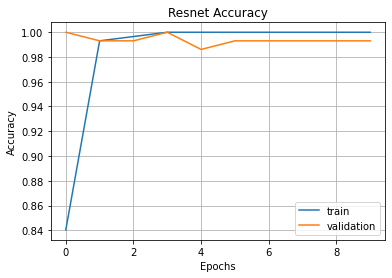

In [10]:
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title("Resnet Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("resnet-accuracy.png")
plt.show()


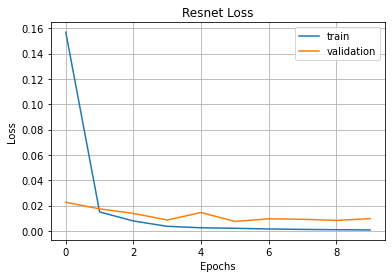

In [11]:
fig1 = plt.gcf()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title("Resnet Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("resnet-loss.png")
plt.show()



In [12]:
np.mean(history.history["accuracy"])

0.9829861164093018

In [13]:
tf.keras.models.save_model(
    resnet_model,
    filepath = "newmodel",
    save_format="tf",
)

INFO:tensorflow:Assets written to: newmodel/assets


INFO:tensorflow:Assets written to: newmodel/assets


In [14]:
from tensorflow.keras.models import load_model
model = load_model("newmodel")

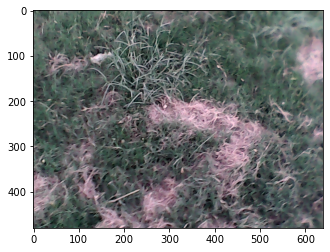

In [15]:
import cv2
img = cv2.imread("grass_20.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
resize = tf.image.resize(img,(180,180))
x = model.predict(np.expand_dims(resize,0))
x

1/1 [==============================] - 0s 146ms/step


array([[1.8272198e-10, 2.4662424e-06, 9.9999642e-01, 1.1103829e-06,
        6.8960615e-11, 1.0557603e-10]], dtype=float32)

In [17]:
output = class_names[np.argmax(x)]
output

'Grass'